# Центральная предельная теорема своими руками

Рассматривается распределение $chi ^{2}$ (хи-квадра́т) с k степенями свободы.
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
%matplotlib inline

## Цистограмма выборки

In [38]:
# Задаем количество степеней свободы k
k = 2

# Генерируем выборку объемом 1000 из распределения
chi_rv = sts.chi2(k)
sample = chi_rv.rvs(1000)

# теоретическая плотность вероятности (pdf)
x = np.linspace(0,30,100)
pdf = chi_rv.pdf(x)

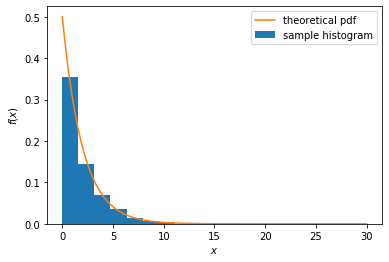

In [39]:
# Строим гистограмму и pdf
plt.hist(sample, density = True, label = 'sample histogram')
plt.plot(x, pdf, label = 'theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Вывод: как видно на графике выше, гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.

## Распределение выборочного среднего 

Согласно Центральной Предельной Теореме выборочные средние $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

Для распределения $chi ^{2}$:$\mathbb{E}X = k$ и $\mathbb{D}X = 2k$. Для случая k = 5: $\mathbb{E}X = 5$ и $\mathbb{D}X = 10$. 

Таким образом, распределение выборочных средних распределения с $\chi ^{2}$ с k степенями свободы будет приближаться нормальным распределением $N(\mu = k, \sigma^2 = \frac{2k}{n})$. Для случая k = 5: $N(\mu = 5, \sigma^2 = \frac{10}{n})$. 

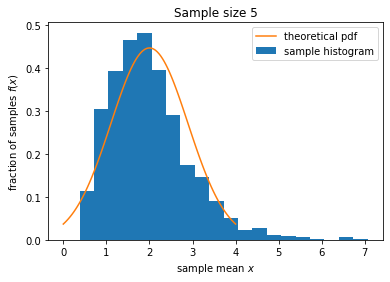

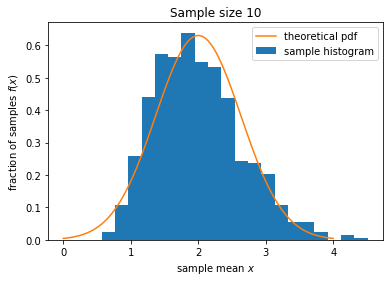

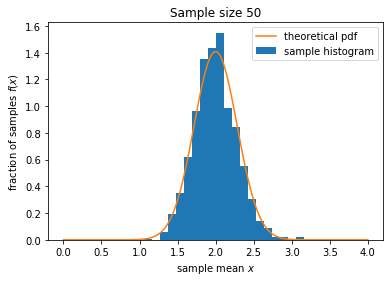

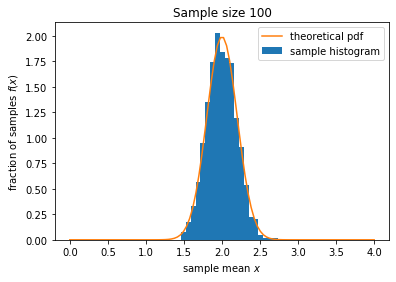

In [40]:
 # для выборок размера n
for n in [5, 10, 50, 100]:
    # сгенерируем выборочные средние по выборкам объема n
    sample_means = []
    for rvn in range(1000):
        sample_means.append(chi_rv.rvs(n).mean())
    # расчитаем pdf - probability density function для нормального распределения
    mu = k # theoretical expectation
    sigma = (2.*k/n) ** 0.5 # theoretical sigma
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,2*k,100)
    pdf = norm_rv.pdf(x)
    # строим гистограмму выборочных средних и теоретическую оценку плотностей верояности нормального распределения
    plt.hist(sample_means, 20, density = True, label = 'sample histogram')
    plt.plot(x, pdf, label = 'theoretical pdf')
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

Вывод: как видно из графиков, чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению. Также стоит отметить, что с ростом n уменьшается дисперсия распределения выборочных средних.